# Import Library yang di perlukan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score


Mengurangi dataset karena berlebihan

In [4]:
df = pd.read_csv("tornados.csv")
df.drop(df.index[6001:462417], inplace=True)

## Supervised Learning

### Support Vector Classifier (SVM)

digunakan pada label kategorikal

In [5]:
X = df[['stf', 'mag']]
y = df['st']

In [6]:
y = np.where(y == 'LA', 1, -1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
svm = SVC(kernel="rbf")

In [9]:
svm.fit(X_train, y_train)

SVC()

# Linear Regression, jika menggunakan label Numerik pada dataset kalian (Regresi).
# Point Plus: Jika ditambah menggunakan Support Vector Regressor/Metode Lainnya beserta penjelasannya pada markdown.

In [10]:
y_pred = svm.predict(X_test)

In [11]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

Plotting menggunakan scatter dari Seaborn dan menampilkan titik titik support vector, lalu membuat garis decision boundary, meshgrid untuk evaluasi model, grafik decision boundary dan garis margin serta menambahkan label dan legenda

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


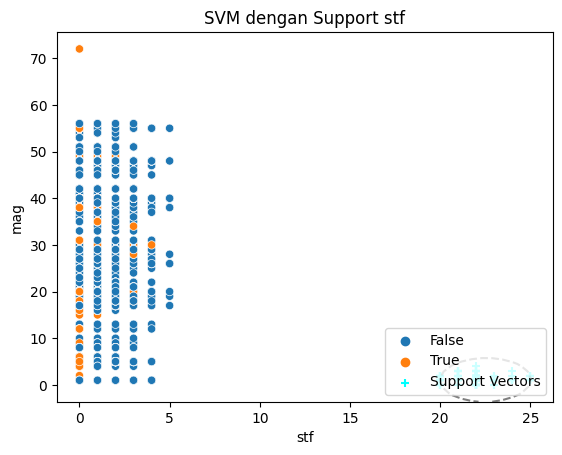

In [13]:
sns.scatterplot(x='mag', y='stf', hue='fc', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('stf')
plt.ylabel('mag')
plt.legend(loc='lower right')
plt.title('SVM dengan Support stf')
plt.show()

Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.

In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.97      1.00      0.99      1755
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1801
   macro avg       0.49      0.50      0.49      1801
weighted avg       0.95      0.97      0.96      1801



C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [15]:
X, y = df[['stf']], df['mag']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [17]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

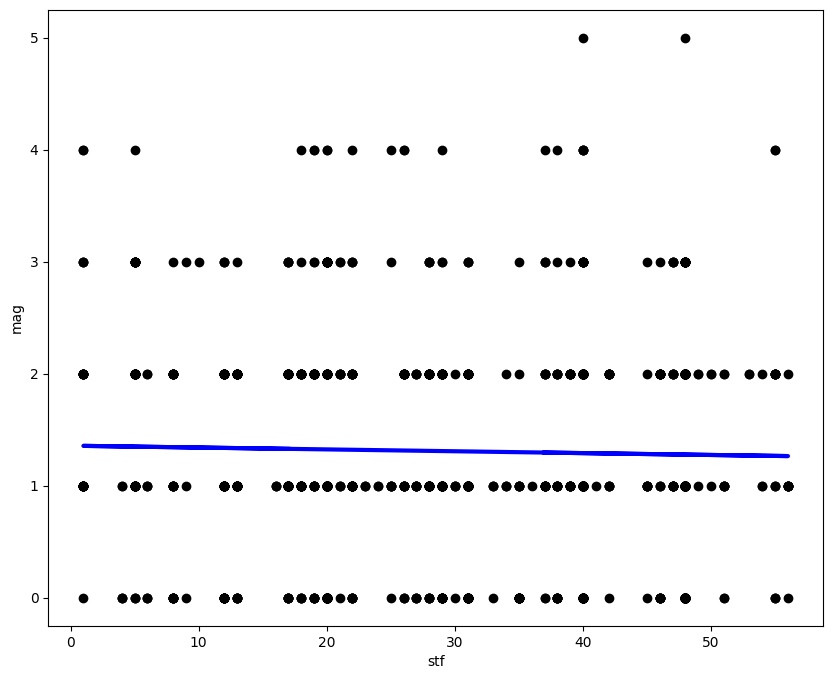

In [18]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("stf")
plt.ylabel("mag")
plt.show()

In [19]:
svm = SVC(kernel="linear")

In [20]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 0.7194004995836802
MSE : 0.9941715237302248
RMSE : 0.9970815030528972
R-Squared : -0.08218284891486927


#  Unsupervised Learning# 
Gunakan kolom numerik untuk fitur nya (variabel X min. 2)
.et 

# Implementasikan metode K-Means pada dataset kalian. Gunakan nilai K sesuai dengan jumlah target

# Menggunakan fitur X dan menentukan banyaknya kelompok

In [22]:
X = df[["stf", "mag"]]
K = 2

In [23]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [24]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

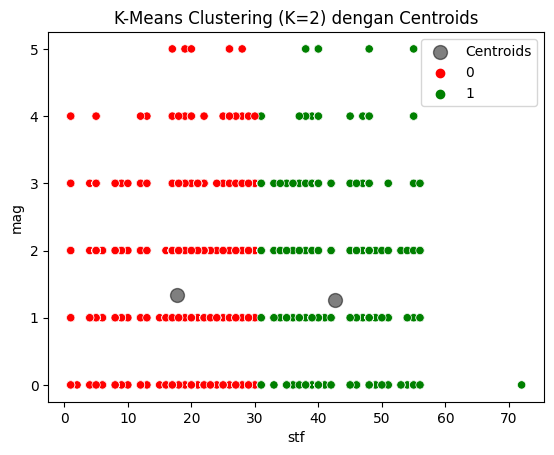

In [25]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="stf", y="mag", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("stf")
plt.ylabel("mag")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [26]:
cross_tab = pd.crosstab(df["cluster"], df["st"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
st       AK   AL   AR  AZ  CA   CO  CT  DE   FL   GA  ...   SD  TN   TX  UT  \
cluster                                               ...                     
0         1  166  217  22  24  134  18   6  195  174  ...    0   0    0   0   
1         0    0    0   0   0    0   0   0    0    0  ...  112  94  805   8   

st       VA  VT  WA   WI  WV  WY  
cluster                           
0         0   0   0    0   0   0  
1        49  10   7  110  10  49  

[2 rows x 49 columns] 



Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [27]:
ari = adjusted_rand_score(df["st"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.12


Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil clustering dengan algoritma K-Means

In [28]:
true_labels_num = df["st"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.36


Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [29]:
homogeneity = homogeneity_score(df["st"], cluster_labels)
completeness = completeness_score(df["st"], cluster_labels)
v_measure = v_measure_score(df["st"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.22
Completeness Score: 1.00
V-Measure Score: 0.36
